## 🧠💡 Intelligent Systems  for Smart Health 👨‍⚕👩‍⚕️🔬🌡️


## Portfolio Exercise 01

# Diabetes prediction

We will again work with data from the NHANES study. But this time we aim to predict something which is a little less dramatic compared to 10-year survival. We want to predict if a patient has **diabetes** or not.

The goal of this portfolio exercise is to complete a full machine learning task from data import to model training an optimization until a final model evaluation.

Good luck!

<a name='import'></a>
## Import Packages

We'll first import all the common packages that we need for this assignment. 

- `shap` is a library that explains predictions made by machine learning models.
- `sklearn` is one of the most popular machine learning libraries.
- `numpy` is a fundamental package for scientific computing in Python.
- `pandas` is what we'll use to manipulate our data.
- `seaborn` is a plotting library which has some convenient functions for visualizing missing data.
- `matplotlib` is a plotting library.

In [1]:
#!pip install lifelines

In [1]:
import os
import shap
import sklearn
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Portfolio exercises:
### 1. load and inspect the data 
- what are missing/problematic entries?

### 2. data cleaning 
- remove, fill, change data (if you think this makes sense or is necessary/benefitial)

### 3. inspect correlations among the features 
- which features do you expect to play a role for a later machine learning model (for predicting diabetes), and why? In ein paar Sätzen beschreiben was und warum. Welche Sachen stechen raus und erklären. Muster erkennen und beschreiben. Diese Feature erläutern und ihre Korrelation zu Diabetes.

### 4. Prepare data for machine learning: 
- Separate data / labels
- Split into train ~70% / validation ~15% / test ~15%

### 5. Train a first model (random forest)
- use validation and training set to avoid overfitting
- optimize your hyperparameters with a simple grid search
- Evaluate the model using accuracy, confusion matrix, f1-score, and ROC curve
- How good is the model? What are the main problems?


### 6. Check if labels are balanced
- If you find that the data is not balanced enough, try to mitigate this problem (e.g. by oversampling or adding class weights).
- Use any hyperparameter search strategy you know (grid search, random search, or Bayesian search)
- Again use the same evaluation metrics as above to inspect the quality of your model.


### 7. Explainability
- Use SHAP to plot the importance of each feature for the predictions
- Use SHAP for two individual predictions (one person with diabetes predicted, one person with lower risk)

- Small check: Train another model (same hyperparameters), but remove the data of the 10 least important features. How does this affect your model performance?

### 8. Conclusion
- How good is your model? Was kann das Model und was nicht. How well can you predict diabetes?
- Could such a model be improved further? If so, what could be done to improve the model?
- Compare your results to current research [Dinh et al., 2019](https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-019-0918-5). Obviously, it is not 100% the same data, but somewhat comparable. Two specific questions to answer: Is your model of comparable type to what they used in their study? And did you get a comparable model performance? Liegt man da im ähnlichen Bereich?


Another article (optional, if you're interested): [Vangeepuram et al., 2021](https://www.nature.com/articles/s41598-021-90406-0#Tab1) 



## Final submission:
Please address all the above mentioned points in this notebook (e.g., using text cells where needed for explanations or answers).
Abgabe bis zum 02.06.

<a name='1'></a>
## 1. The Dataset

We will (again) work with actual medical data in this notebook, namely the NHANES I epidemiology dataset (for a detailed description of this dataset you can check the [CDC Website](https://wwwn.cdc.gov/nchs/nhanes/nhefs/default.aspx/)).

This time we will work with data from the period 2017-2018 which was downloaded via the pip package `nhanes` [GitHub link](https://github.com/poldrack/nhanes).

Most features are described within the GitHub repository. Some important information on the provided features:

- `Gender` - 1 is female, 0 is male
- `diabetes` - 1 means diabetes was diagnosed
- `diabetes_borderline` - 1 means "borderline diabetes" (close to having diabetes) was diagnosed
- `Smoking` - 1 means person has smoked within the last 5 days. People with missing entries were set to 0
- `PhysicalActivity` - 0 means no particular activities, 1 means "moderate recreational activities" or walking, biking and 2 means more extensive recreational activities
- `SEQN` is an ID


### Load and explore the data!

In virtually all cases, we would first want to get an intuition on the data itself. Things like: What is in the data? How much data is there? Are there things missing? What might cause problems? Do we understand the type of data/features?



In [2]:
path_data = "data"

In [3]:
filename = "NHANES_2017_2018_diabetes.csv"
data = pd.read_csv(os.path.join(path_data, filename))

In [5]:
data.head()

,SEQN,Gender,AgeInYearsAtScreening,HaveSeriousDifficultySeeing,HaveSeriousDifficultyHearing,WeightKg,StandingHeightCm,BodyMassIndexKgm2,BloodMercuryTotalUgl,BloodManganeseUgl,...,TotalSugarsGm_DR1TOT,BloodLeadUgdl,60SecPulse30SecPulse2,DirectHdlcholesterolMgdl,TotalCholesterolMgdl,SystolicBloodPres2NdRdgMmHg,Smoking,PhysicalActivity,diabetes,diabetes_borderline
0,93703.0,1,2.0,0.0,0.0,13.7,88.6,17.5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,0,0
1,93704.0,0,2.0,0.0,0.0,13.9,94.2,15.7,0.47,9.41,...,76.97,NaN,NaN,NaN,NaN,NaN,0,0.0,0,0
2,93705.0,1,66.0,0.0,0.0,79.5,158.3,31.7,1.07,8.57,...,91.55,2.98,52.0,60.0,157.0,NaN,0,1.0,0,0
3,93706.0,0,18.0,0.0,0.0,66.3,175.7,21.5,10.64,14.07,...,14.73,0.74,82.0,47.0,148.0,114.0,0,1.0,0,0
4,93707.0,0,13.0,0.0,0.0,45.4,158.4,18.1,0.20,12.60,...,84.22,0.39,100.0,68.0,189.0,128.0,0,0.0,0,0


### 1. Inspect the data 

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8366 entries, 0 to 8365
Data columns (total 29 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SEQN                                     8366 non-null   float64
 1   Gender                                   8366 non-null   int64  
 2   AgeInYearsAtScreening                    8366 non-null   float64
 3   HaveSeriousDifficultySeeing              8365 non-null   float64
 4   HaveSeriousDifficultyHearing             8365 non-null   float64
 5   WeightKg                                 8242 non-null   float64
 6   StandingHeightCm                         8016 non-null   float64
 7   BodyMassIndexKgm2                        8005 non-null   float64
 8   BloodMercuryTotalUgl                     7513 non-null   float64
 9   BloodManganeseUgl                        7513 non-null   float64
 10  BloodSeleniumUgl                         7513 no

##### Allgemeine Infos: 29 Features (inkl. ID), float and integer Datentypen, es gibt einige Feature bei denen Daten fehlen (ca. 20%, z.B. SystolicBloodPressure..)


### Fehlende Einträge: 
Die meisten fehlenden Einträge (unter 7000 von 8366 Datenpunkte) liegen bei foglenden Spalten vor: BloodLeadUgdl, 60SecPulse30SecPulse2, DirectHdlcholesterolMgdl, TotalCholesterolMgdl, SystolicBloodPres2NdRdgMmHg. Generell sind fehlende Daten recht problematisch.

In [7]:
data.describe()

,SEQN,Gender,AgeInYearsAtScreening,HaveSeriousDifficultySeeing,HaveSeriousDifficultyHearing,WeightKg,StandingHeightCm,BodyMassIndexKgm2,BloodMercuryTotalUgl,BloodManganeseUgl,...,TotalSugarsGm_DR1TOT,BloodLeadUgdl,60SecPulse30SecPulse2,DirectHdlcholesterolMgdl,TotalCholesterolMgdl,SystolicBloodPres2NdRdgMmHg,Smoking,PhysicalActivity,diabetes,diabetes_borderline
count,8366.000000,8366.000000,8366.000000,8365.000000,8365.000000,8242.000000,8016.000000,8005.000000,7513.000000,7513.000000,...,7.285000e+03,6884.000000,6742.000000,6738.000000,6738.000000,6563.000000,8366.000000,8366.000000,8366.000000,8366.000000
mean,98320.869950,0.510638,35.830026,0.052481,0.062762,67.499260,156.593401,26.577502,1.142698,10.316152,...,1.065502e+02,1.084214,73.749926,53.392550,179.894627,121.614810,0.135429,0.506096,0.101960,0.020918
std,2669.896206,0.499917,24.905061,0.223007,0.242548,31.377152,22.257858,8.260724,2.269646,3.762158,...,7.318534e+01,1.290628,12.380546,14.745844,40.602248,20.474269,0.342202,0.707672,0.302614,0.143118
min,93703.000000,0.000000,1.000000,0.000000,0.000000,8.300000,78.300000,12.300000,0.200000,1.570000,...,5.397605e-79,0.050000,34.000000,10.000000,76.000000,72.000000,0.000000,0.000000,0.000000,0.000000
25%,96003.250000,0.000000,12.000000,0.000000,0.000000,48.700000,151.400000,20.400000,0.200000,7.750000,...,5.815000e+01,0.460000,66.000000,43.000000,151.000000,106.000000,0.000000,0.000000,0.000000,0.000000
50%,98332.500000,1.000000,33.000000,0.000000,0.000000,69.200000,161.900000,25.800000,0.510000,9.710000,...,9.197000e+01,0.760000,72.000000,51.000000,176.000000,118.000000,0.000000,0.000000,0.000000,0.000000
75%,100629.750000,1.000000,59.000000,0.000000,0.000000,86.500000,171.200000,31.300000,1.120000,12.130000,...,1.362100e+02,1.300000,82.000000,61.000000,204.000000,132.000000,0.000000,1.000000,0.000000,0.000000
max,102956.000000,1.000000,80.000000,1.000000,1.000000,242.600000,197.700000,86.200000,63.640000,52.000000,...,9.311600e+02,42.480000,136.000000,189.000000,446.000000,236.000000,1.000000,2.000000,1.000000,1.000000


array([[<Axes: title={'center': 'SEQN'}>,
        <Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'AgeInYearsAtScreening'}>,
        <Axes: title={'center': 'HaveSeriousDifficultySeeing'}>,
        <Axes: title={'center': 'HaveSeriousDifficultyHearing'}>],
       [<Axes: title={'center': 'WeightKg'}>,
        <Axes: title={'center': 'StandingHeightCm'}>,
        <Axes: title={'center': 'BodyMassIndexKgm2'}>,
        <Axes: title={'center': 'BloodMercuryTotalUgl'}>,
        <Axes: title={'center': 'BloodManganeseUgl'}>],
       [<Axes: title={'center': 'BloodSeleniumUgl'}>,
        <Axes: title={'center': 'BloodCadmiumUgl'}>,
        <Axes: title={'center': 'AnnualFamilyIncome'}>,
        <Axes: title={'center': 'AlcoholGm_DR1TOT'}>,
        <Axes: title={'center': 'CholesterolMg_DR1TOT'}>],
       [<Axes: title={'center': 'TotalPolyunsaturatedFattyAcidsGm_DR1TOT'}>,
        <Axes: title={'center': 'TotalMonounsaturatedFattyAcidsGm_DR1TOT'}>,
        <Axes: title={'c

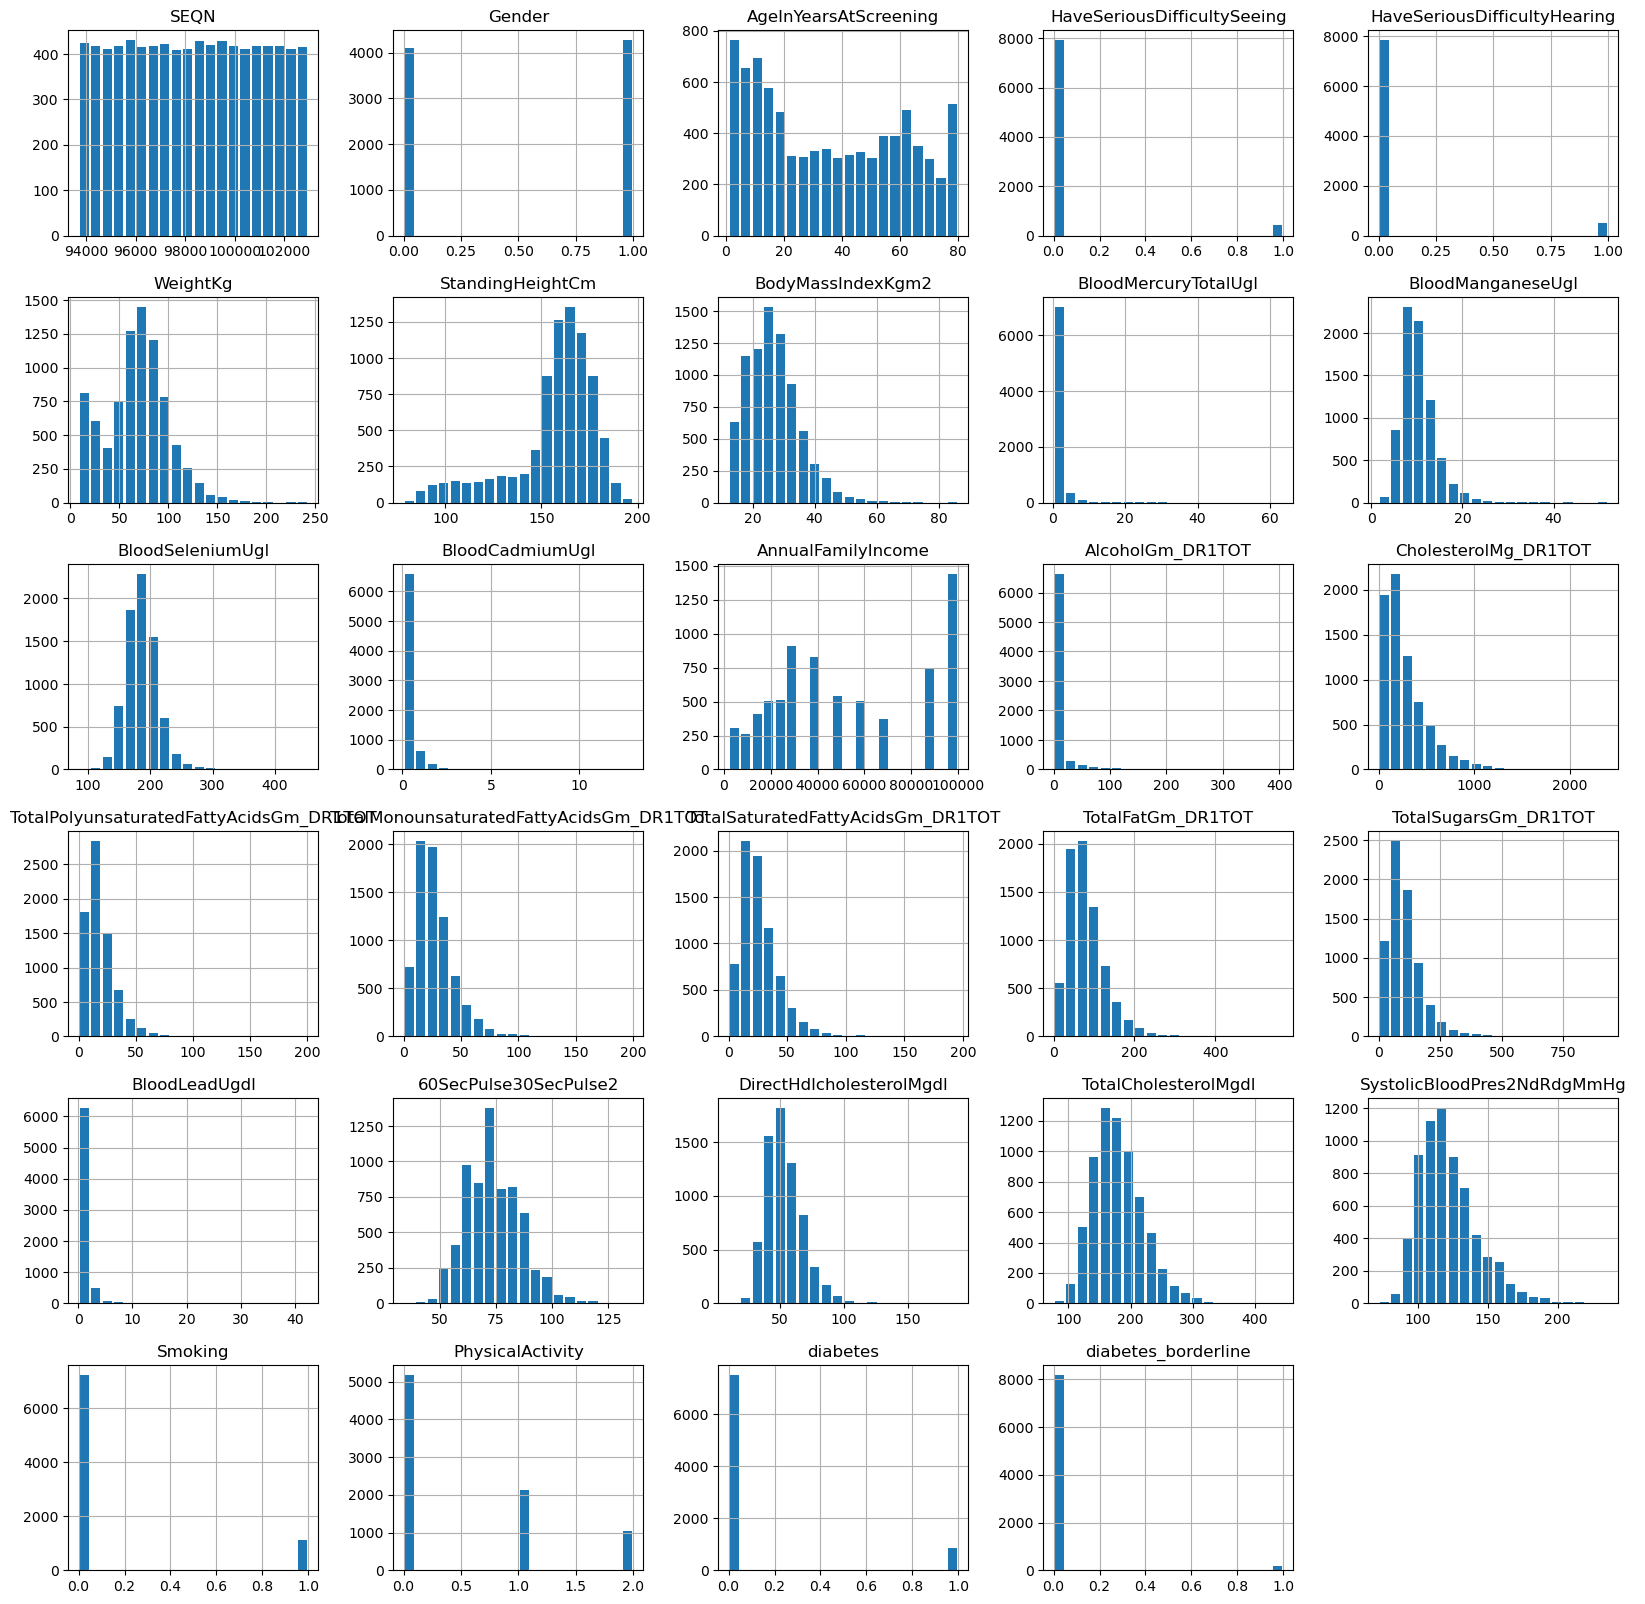

In [8]:
data.hist(figsize=(20,20), bins=20, rwidth=0.8)

In [9]:
data["diabetes"].value_counts()

0    7513
1     853
Name: diabetes, dtype: int64

### Problematische Einträge
##### Fehlende Daten (wie oben beschrieben)
##### Unausgewogene Verteilung der Daten:
- Bias bei Diabetes und Diabetes_Borderline. Die wenigsten Teilnehmer hatten Diabetes (ca. 10%) und noch weniger hatten fast Diabetes (ca. 2% der Datenpunkte)
- Ausreiser bei einigen Features wie zum Beispiel BloodLeadUgdl, AlcoholGM, BloodCadmiumUgl
- Bias bei Smoking. Der größte Teil der Teilnehmer hat entweder nichts eingetragen oder war Nichtraucher
- Bias bei Hör- und Sehproblemen

### 2. Data cleaning
- remove, fill, change data (if you think this makes sense or is necessary/benefitial)


In [4]:
data.set_index('SEQN', inplace=True)
data.head()

,Gender,AgeInYearsAtScreening,HaveSeriousDifficultySeeing,HaveSeriousDifficultyHearing,WeightKg,StandingHeightCm,BodyMassIndexKgm2,BloodMercuryTotalUgl,BloodManganeseUgl,BloodSeleniumUgl,...,TotalSugarsGm_DR1TOT,BloodLeadUgdl,60SecPulse30SecPulse2,DirectHdlcholesterolMgdl,TotalCholesterolMgdl,SystolicBloodPres2NdRdgMmHg,Smoking,PhysicalActivity,diabetes,diabetes_borderline
SEQN,,,,,,,,,,,,,,,,,,,,,
93703.0,1,2.0,0.0,0.0,13.7,88.6,17.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,0,0
93704.0,0,2.0,0.0,0.0,13.9,94.2,15.7,0.47,9.41,142.28,...,76.97,NaN,NaN,NaN,NaN,NaN,0,0.0,0,0
93705.0,1,66.0,0.0,0.0,79.5,158.3,31.7,1.07,8.57,185.71,...,91.55,2.98,52.0,60.0,157.0,NaN,0,1.0,0,0
93706.0,0,18.0,0.0,0.0,66.3,175.7,21.5,10.64,14.07,199.44,...,14.73,0.74,82.0,47.0,148.0,114.0,0,1.0,0,0
93707.0,0,13.0,0.0,0.0,45.4,158.4,18.1,0.20,12.60,179.34,...,84.22,0.39,100.0,68.0,189.0,128.0,0,0.0,0,0


In [5]:
data_cleaned = data.dropna(axis=0)
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 4905 entries, 93707.0 to 102956.0
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Gender                                   4905 non-null   int64  
 1   AgeInYearsAtScreening                    4905 non-null   float64
 2   HaveSeriousDifficultySeeing              4905 non-null   float64
 3   HaveSeriousDifficultyHearing             4905 non-null   float64
 4   WeightKg                                 4905 non-null   float64
 5   StandingHeightCm                         4905 non-null   float64
 6   BodyMassIndexKgm2                        4905 non-null   float64
 7   BloodMercuryTotalUgl                     4905 non-null   float64
 8   BloodManganeseUgl                        4905 non-null   float64
 9   BloodSeleniumUgl                         4905 non-null   float64
 10  BloodCadmiumUgl                     

#### Zeilen die NaN enthielten wurden entfernt.

array([[<Axes: title={'center': 'diabetes'}>]], dtype=object)

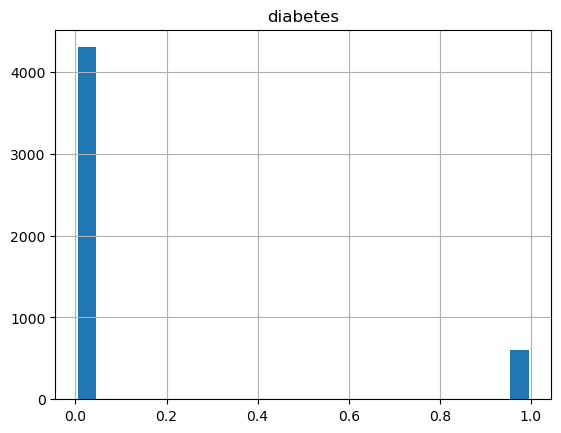

In [12]:
data_cleaned.hist(column="diabetes", bins=20, rwidth=0.8)

In [13]:
data_cleaned["diabetes"].value_counts()

0    4304
1     601
Name: diabetes, dtype: int64

##### Der Bias im Label wurde durch das Löschen der Zeilen mit NaN nicht beeinträchtigt. Allerdings liegen nun noch weniger Daten vor, welche die positve Diabetes Diagnose enthalten.

### 3. Inspect correlations among the features 
Which features do you expect to play a role for a later machine learning model (for predicting diabetes), and why? In ein paar Sätzen beschreiben was und warum. Welche Sachen stechen raus und erklären. Muster erkennen und beschreiben. Diese Feature erläutern und ihre Korrelation zu Diabetes.

<Axes: >

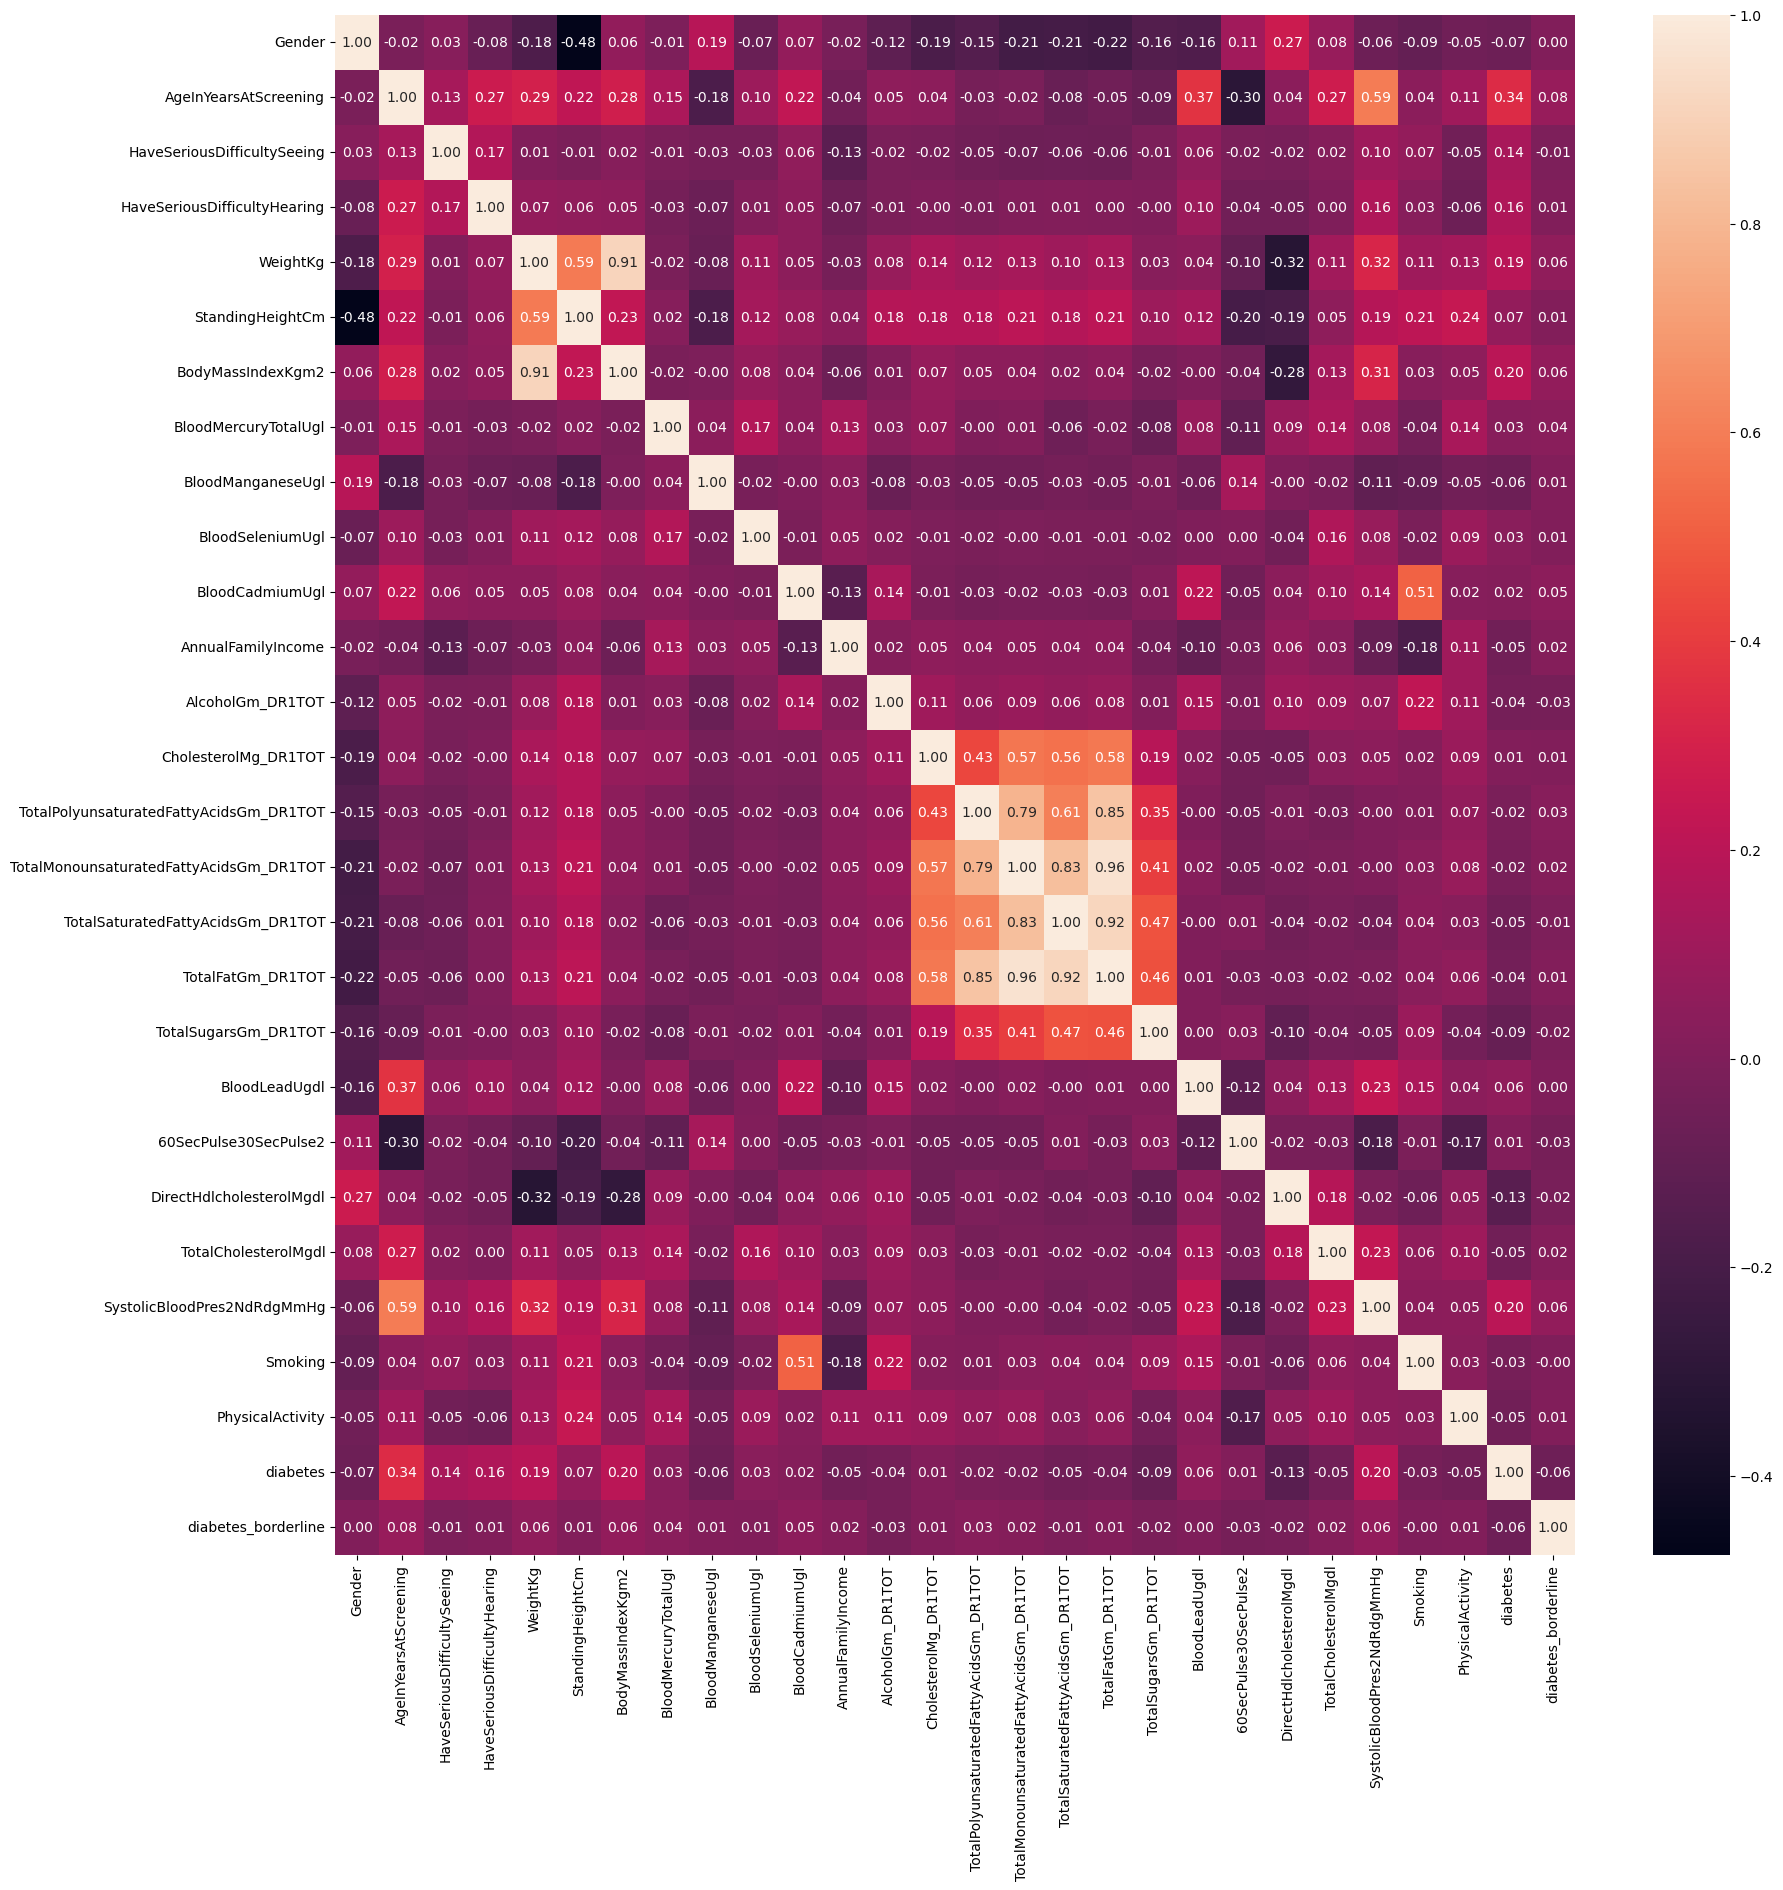

In [14]:
fig, ax = plt.subplots(figsize=(20,20))
sb.heatmap(data_cleaned.corr(), annot=True, fmt='.2f', ax=ax)

In [15]:
#count how many people with diabetes have serious hearing or seeing difficulty
mask_problems_to_hear = (data_cleaned["HaveSeriousDifficultyHearing"] == 1.0)  & (data_cleaned["diabetes"] == 1)
mask_problems_to_see = (data_cleaned["HaveSeriousDifficultySeeing"] == 1.0)  & (data_cleaned["diabetes"] == 1)
print("Personen mit Hörproblemen:", data_cleaned["HaveSeriousDifficultyHearing"].value_counts()[1], "davon mit Diabetes:", len(data_cleaned[mask_problems_to_hear]))
print("Personen mit Sehproblemen:", data_cleaned["HaveSeriousDifficultySeeing"].value_counts()[1], "davon mit Diabetes:", len(data_cleaned[mask_problems_to_see]))

Personen mit Hörproblemen: 372 davon mit Diabetes: 114
Personen mit Sehproblemen: 285 davon mit Diabetes: 86


##### Korrelationen zwischen den Features:
- Starke Korrelationen zwischen TotalFat und den einfach-/mehrfach un-/gesättigten Fettsäuren
    ->  Das Merkmal TotalFat setzt sich wahrscheinlich aus den o.g. Merkmalen zusammen und korreliert deshalb stark

- Starke Korrelationen zwischen den einfach-/mehrfach un-/gesättigten Fettsäuren
    -> Bei der Aufnahme von Lebensmitteln nimmt man sowohl einfach- als auch mehrfach gesättigte oder ungesättigte Fettsäuren auf. In der Regel steigt also beim Verzehr von fettiger Nahrung nicht nur einer dieser Blutwerte an sondern alle.
    
- Korrelationen zwischen Gewicht, BMI und Größe
    ->  Das BMI wird anhand der Größe und dem Gewicht berechnet, korreliert also mit diesen Features

- Starke Korrelation zwischen Gewicht und Größe 
    -> Je größer ein Mensch, desto schwerer ist er

- Mäßige Korrelation zwischen Rauchen und Cadmium im Blut (BloodCadmium)
    -> Im Zigarettenrauch kommt der Schadstoff Cadmium vor der beim Rauchen vom Körper aufgenommen wird

- Mäßige Korrelation zwischen AgeInYearsAtScreening (Alter) mit Gewicht (WeightKg), Größe (StandingHeight), BodyMassIndex und systolischem Blutdruck.
    -> Das Alter beeinflusst natürlich die oben genannten Features, da junge Menschen noch nicht ausgewachsen sind, diese also weniger wiegen und kleiner sind. 
    -> Der Blutdruck wird ebenfalls vom Alter beeinflusst, da mit zunehmendem Alter die Arterien an Elastizität verlieren und steifere Arterien den Blutdruck steigen lassen.

##### Korrelationen zwischen Diabetes und den anderen Features:
-> Die höchste Korrelation tritt in Zusammenhang mit dem Alter auf, gefolgt von dem systolischen Blutdruck, dem BMI und dem Gewicht. 
 


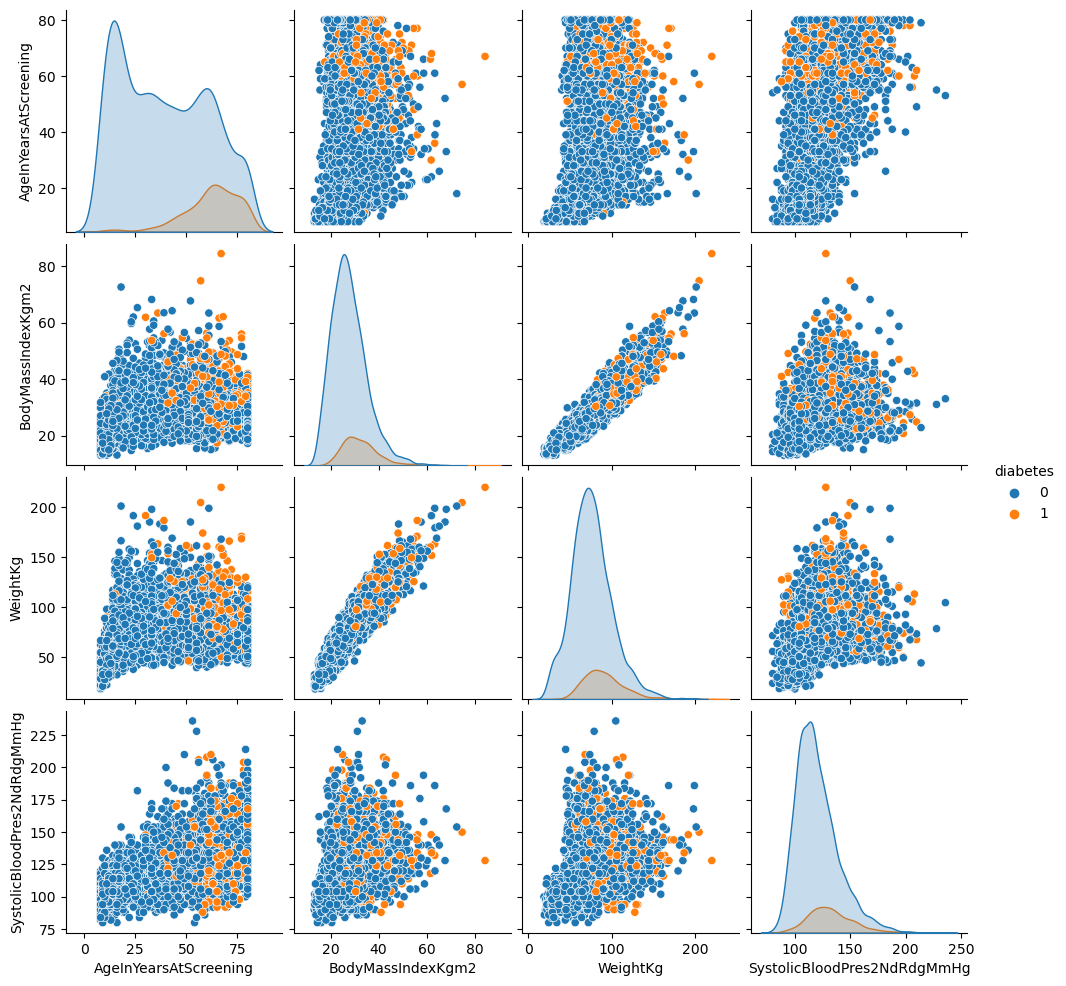

In [16]:
sb.pairplot(data=data_cleaned, vars=['AgeInYearsAtScreening', 'BodyMassIndexKgm2', 'WeightKg', 'SystolicBloodPres2NdRdgMmHg'], hue='diabetes')

##### Which features do you expect to play a role for a later machine learning model (for predicting diabetes), and why? 

Ich denke das vorallem die Features Alter, systolischer Blutdruck, BMI und Gewicht eine starke Rolle bei dem machine learning model spielen werden. Diese Merkmale korrelieren am stärksten mit der Diagnose Diabetes. Man kann im Pairplot gut erkennen, dass die Diagnose vorallem bei Menschen ab 60 Jahren auftritt. Tendenziell mit steigendem Alter. Das Feature systolischer Blutdruck korreliert ebenfalls mit dem Alter sowie mit der Diagnose. Es könnte also auch einen Einfluss ausüben. Das Gewicht und der BMI korrelieren stark zueinander, wie oben beschrieben, da der BMI unteranderem auch aus dem Gewicht berechnet wird. Im Pairplot erkennt man den Einfluss des BMIs auf die Diagnose. Tendenziell fällt die Diagnose bei höherem BMI öfter positiv aus. Im Plot kann man erkennen, dass dieser deutlich ansteigt bei einem BMI um die 30. Die Diagnose trifft also öfter auf übergewichtige Menschen zu.

Weitere Muster finden sich unteranderem zwischen den Fettsäuren untereinander und im Vergleich zum Gesamtfett. Auch der Cadmiumwert im Blut scheint als Raucher anzusteigen (wie oben erklärt).

Interessant ist auch, dass gut 30 Prozent der Personen mit Hör- oder Sehproblemen ebenfalls mit Diabetes diagnostiziert wurden. Das könnte wahrscheinlich daran liegen, dass diese Probleme ebenfalls mit steigendem Alter auftreten. Da es nur wenige Datenpunkte für diese Merkmale gibt, wird das aber kein großen Einfluss auf das Model haben.  

Das Feature diabetes_borderline wird im Model kaum Einfluss ausüben, da die Datenpunkte einen zu starken Bias haben. In gerade mal 2% der Daten wurde dieses Feature diagnostiziert (2% der Teilnehmer stehen kurz vor einer positiven Diabetes Diagnose) 

### 4. Prepare data for machine learning: 
- Separate data / labels
- Split into train ~70% / validation ~15% / test ~15%


In [6]:
X = data_cleaned.drop(columns="diabetes", axis=1)
X.head()

,Gender,AgeInYearsAtScreening,HaveSeriousDifficultySeeing,HaveSeriousDifficultyHearing,WeightKg,StandingHeightCm,BodyMassIndexKgm2,BloodMercuryTotalUgl,BloodManganeseUgl,BloodSeleniumUgl,...,TotalFatGm_DR1TOT,TotalSugarsGm_DR1TOT,BloodLeadUgdl,60SecPulse30SecPulse2,DirectHdlcholesterolMgdl,TotalCholesterolMgdl,SystolicBloodPres2NdRdgMmHg,Smoking,PhysicalActivity,diabetes_borderline
SEQN,,,,,,,,,,,,,,,,,,,,,
93707.0,0,13.0,0.0,0.0,45.4,158.4,18.1,0.20,12.60,179.34,...,89.18,84.22,0.39,100.0,68.0,189.0,128.0,0,0.0,0
93708.0,1,66.0,0.0,0.0,53.5,150.2,23.7,15.23,15.09,178.79,...,65.49,49.84,1.53,68.0,88.0,209.0,138.0,0,1.0,1
93711.0,0,56.0,0.0,0.0,62.1,170.6,21.3,0.20,6.55,206.39,...,124.24,148.21,2.15,62.0,72.0,238.0,94.0,0,2.0,0
93712.0,0,18.0,0.0,0.0,58.9,172.8,19.7,0.53,8.73,173.81,...,63.90,125.01,0.27,68.0,48.0,182.0,116.0,1,2.0,0
93713.0,0,67.0,0.0,0.0,74.9,178.6,23.5,0.20,9.67,215.84,...,114.30,109.91,3.71,90.0,48.0,184.0,104.0,1,1.0,0


In [7]:
y = data_cleaned["diabetes"]
y.head()

SEQN
93707.0    0
93708.0    0
93711.0    0
93712.0    0
93713.0    0
Name: diabetes, dtype: int64

In [19]:
X.shape, y.shape

((4905, 27), (4905,))

In [8]:
X_dev, X_test, y_dev, y_test = train_test_split(X,y,test_size=0.15,random_state=10)
X_train, X_val, y_train, y_val = train_test_split(X_dev,y_dev,test_size=0.176,random_state=10)
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((3435, 27), (734, 27), (736, 27), (3435,), (734,), (736,))

### 5. Train a first model (random forest)
- use validation and training set to avoid overfitting
- optimize your hyperparameters with a simple grid search
- Evaluate the model using accuracy, confusion matrix, f1-score, and ROC curve
- How good is the model? What are the main problems?


In [21]:
from sklearn.model_selection import GridSearchCV
parameters ={"max_depth":[3,6,7,9,15],
             "min_samples_leaf":[2,3,4,5,6],
             "n_estimators":[20,25,30,35,40]
             }
forest = RandomForestClassifier()
grid_search = GridSearchCV(forest,parameters,verbose=2)
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 125 candidates, totalling 625 fits
[CV] END ...max_depth=3, min_samples_leaf=2, n_estimators=20; total time=   0.1s
[CV] END ...max_depth=3, min_samples_leaf=2, n_estimators=20; total time=   0.2s
[CV] END ...max_depth=3, min_samples_leaf=2, n_estimators=20; total time=   0.1s
[CV] END ...max_depth=3, min_samples_leaf=2, n_estimators=20; total time=   0.1s
[CV] END ...max_depth=3, min_samples_leaf=2, n_estimators=20; total time=   0.1s
[CV] END ...max_depth=3, min_samples_leaf=2, n_estimators=25; total time=   0.1s
[CV] END ...max_depth=3, min_samples_leaf=2, n_estimators=25; total time=   0.1s
[CV] END ...max_depth=3, min_samples_leaf=2, n_estimators=25; total time=   0.1s
[CV] END ...max_depth=3, min_samples_leaf=2, n_estimators=25; total time=   0.1s
[CV] END ...max_depth=3, min_samples_leaf=2, n_estimators=25; total time=   0.1s
[CV] END ...max_depth=3, min_samples_leaf=2, n_estimators=30; total time=   0.2s
[CV] END ...max_depth=3, min_samples_leaf=2, n

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 6, 7, 9, 15],
                         'min_samples_leaf': [2, 3, 4, 5, 6],
                         'n_estimators': [20, 25, 30, 35, 40]},
             verbose=2)

In [22]:
grid_search.best_params_

{'max_depth': 15, 'min_samples_leaf': 2, 'n_estimators': 20}

In [24]:
y_predictions = grid_search.best_estimator_.predict(X_val)

### C-Index

In [25]:
# in this context we will also use the c-index to evaluate our models
import lifelines

def cindex(y_true, scores):
    return lifelines.utils.concordance_index(y_true, scores)

y_train_preds = grid_search.best_estimator_.predict_proba(X_train)[:, 1]
print(f"Train C-Index: {cindex(y_train.values, y_train_preds)}")

y_val_preds = grid_search.best_estimator_.predict_proba(X_val)[:, 1]
print(f"Val C-Index: {cindex(y_val.values, y_val_preds)}")

Train C-Index: 0.9998269741074617
Val C-Index: 0.8235871010638298


### Accuracy

In [26]:
from sklearn import metrics

accuracy = metrics.accuracy_score(y_val,y_predictions)
accuracy

0.8692098092643051

### Confusion Matrix

In [26]:
def plot_confusion_matrix(confusion_matrix):
    # Plot the confusion matrix using Seaborn's heatmap
    plt.figure(figsize=(10, 6), dpi=50)
    sb.heatmap(confusion_matrix, annot=True, annot_kws={"size": 16},
               cmap="Purples",
               fmt="g")

    # Set labels and title
    plt.xlabel('Predicted', fontsize=16)
    plt.ylabel('Actual', fontsize=16)
    plt.title('Confusion Matrix', fontsize=20)

    # Show the plot
    plt.show()

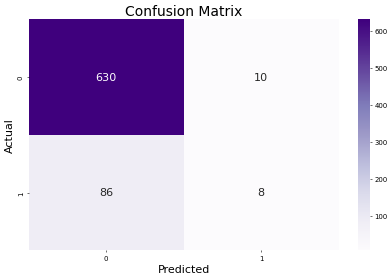

In [30]:
from sklearn import metrics

conf_matrix = metrics.confusion_matrix(y_val,y_predictions)
plot_confusion_matrix(conf_matrix)

Viele falsch negative Vorhersagen, kaum true positiv Ergebnisse

### F1-Score

In [31]:
f1 = metrics.f1_score(y_val,y_predictions)
f1

0.14285714285714285

Model ist nicht gut balanciert (siehe ergebnis)

### ROC-Curve

In [30]:
def plot_roc_curve(labels, predicted_labels):
    # Calculate the false positive rate (FPR) and true positive rate (TPR)
    fpr, tpr, _ = metrics.roc_curve(labels, predicted_labels)

    # Calculate the AUC (Area Under the Curve)
    roc_auc = metrics.auc(fpr, tpr)

    # Plot the ROC curve
    fig, ax = plt.subplots(figsize=(8, 8), dpi=50)
    ax.plot(fpr, tpr, color='cornflowerblue', lw=2, 
            label=f'ROC curve (AUC = {roc_auc:.2f})')
    ax.plot([0, 1], [0, 1], color='navy', lw=2,
            linestyle='--')  # Diagonal line
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=18)
    plt.legend(loc="lower right", fontsize=14)
    plt.grid(True)

    # Show the plot
    plt.show()

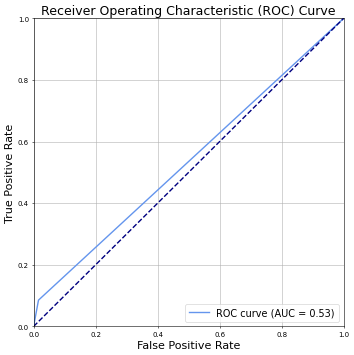

In [33]:
plot_roc_curve(y_val,y_predictions)

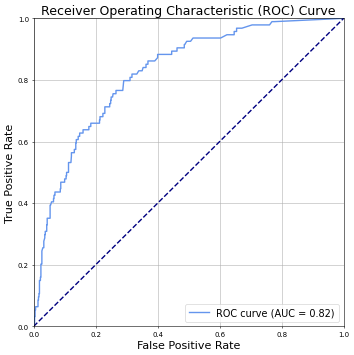

In [34]:
y_predictions_proba = grid_search.best_estimator_.predict_proba(X_val)[:,1]
plot_roc_curve(y_val,y_predictions_proba)

#### Beurteilung des bisherigen Trainings:
Die Validierungsmetrik "Accuracy" weist einen hohen Wert auf. Dieser hat, durch die Disbalance des Labels, allerdings keine gute Aussagekraft. Die Metriken ROC-Curve & Konfusionsmatrix zeigen deutlich auf, dass gerade die True Positive Vorhersagen sehr schlecht sind. Der F1-Score zeigt diese Disbalance ebenfalls.   

### 6. Check if labels are balanced
- If you find that the data is not balanced enough, try to mitigate this problem (e.g. by oversampling or adding class weights).
- Use any hyperparameter search strategy you know (grid search, random search, or Bayesian search)
- Again use the same evaluation metrics as above to inspect the quality of your model.

In [89]:
from sklearn.model_selection import RandomizedSearchCV

parameters ={"max_depth":[3,5,6,7,8,9,10,12,15,17,20],
             "min_samples_leaf":[1,2,3,4,5,6],
             "n_estimators":[10,11,12,13,14,15,16,17,18,19,20,25,30,35,40],
             }
forest = RandomForestClassifier()
random_search = RandomizedSearchCV(forest,parameters,n_iter=20, verbose=2)
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END ..max_depth=15, min_samples_leaf=6, n_estimators=19; total time=   0.3s
[CV] END ..max_depth=15, min_samples_leaf=6, n_estimators=19; total time=   0.1s
[CV] END ..max_depth=15, min_samples_leaf=6, n_estimators=19; total time=   0.1s
[CV] END ..max_depth=15, min_samples_leaf=6, n_estimators=19; total time=   0.1s
[CV] END ..max_depth=15, min_samples_leaf=6, n_estimators=19; total time=   0.2s
[CV] END ...max_depth=9, min_samples_leaf=5, n_estimators=35; total time=   0.2s
[CV] END ...max_depth=9, min_samples_leaf=5, n_estimators=35; total time=   0.2s
[CV] END ...max_depth=9, min_samples_leaf=5, n_estimators=35; total time=   0.3s
[CV] END ...max_depth=9, min_samples_leaf=5, n_estimators=35; total time=   0.3s
[CV] END ...max_depth=9, min_samples_leaf=5, n_estimators=35; total time=   0.2s
[CV] END ...max_depth=9, min_samples_leaf=4, n_estimators=13; total time=   0.1s
[CV] END ...max_depth=9, min_samples_leaf=4, n_

RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [3, 5, 6, 7, 8, 9, 10, 12,
                                                      15, 17, 20],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6],
                                        'n_estimators': [10, 11, 12, 13, 14, 15,
                                                         16, 17, 18, 19, 20, 25,
                                                         30, 35, 40]},
                   verbose=2)

In [90]:
random_search.best_params_

{'n_estimators': 19, 'min_samples_leaf': 6, 'max_depth': 15}

Beste Parameter: {'n_estimators': 19, 'min_samples_leaf': 6, 'max_depth': 15}


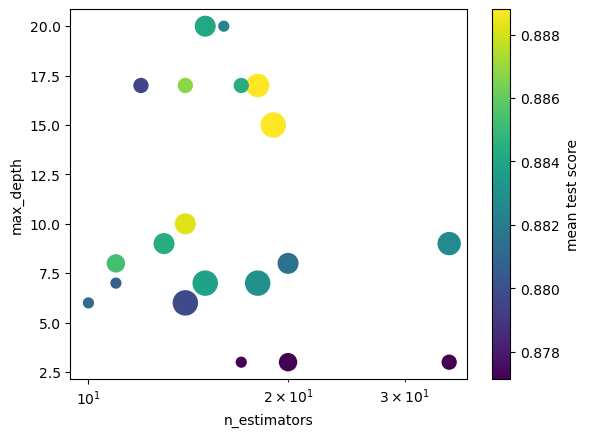

In [91]:
xlabel = "n_estimators"
ylabel = "max_depth"
zlabel = "min_samples_leaf"
x = []
y = []
z = []
for param in random_search.cv_results_["params"]:
    x.append(param[xlabel])
    y.append(param[ylabel])
    z.append(param[zlabel])

plt.scatter(x, y, s=50*np.array(z),
            c=random_search.cv_results_["mean_test_score"])
plt.colorbar(label="mean test score")
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.xscale("log")

##### RandomSearch ist zeitlich performanter. Man kann an der Grafik gut erkennen, dass mehrere Parametereinstellungen gefunden wurden, die zu einem guten Ergebnis führen. Im Vergleich zur ersten Grid-Search bin ich bei dieser Suche feingranularer vorgegangen und habe mehr Parameter abgesucht. Ich habe mich für eine Random Search entschieden, weil eine Grid Search mit so vielen Parametern auf meinem PC zu lange dauert.

In [121]:
cv_results_df = pd.DataFrame(random_search.cv_results_)
cv_results_df.sort_values(by="mean_test_score", ascending=False).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_leaf,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.246250,0.055777,0.008730,0.003836,19,6,15,"{'n_estimators': 19, 'min_samples_leaf': 6, 'm...",0.895197,0.895197,0.893741,0.879185,0.880640,0.888792,0.007284,1
17,0.159295,0.003251,0.005578,0.001085,18,5,17,"{'n_estimators': 18, 'min_samples_leaf': 5, 'm...",0.898108,0.892285,0.889374,0.879185,0.885007,0.888792,0.006418,1
16,0.122801,0.001364,0.005464,0.001030,14,4,10,"{'n_estimators': 14, 'min_samples_leaf': 4, 'm...",0.889374,0.887918,0.890830,0.886463,0.886463,0.888210,0.001698,3
11,0.146865,0.008400,0.005122,0.000825,14,2,17,"{'n_estimators': 14, 'min_samples_leaf': 2, 'm...",0.895197,0.892285,0.882096,0.871907,0.892285,0.886754,0.008656,4
19,0.090641,0.001299,0.004334,0.000609,11,3,8,"{'n_estimators': 11, 'min_samples_leaf': 3, 'm...",0.886463,0.890830,0.889374,0.882096,0.877729,0.885298,0.004819,5


Es gab sogar 2 Parametereinstellungen mit dem gleichen Mean Test Score

In [9]:
class_weights = {False:1, True:100}

forest_weighted = RandomForestClassifier(n_estimators=19,
                                max_depth=15,
                                min_samples_leaf=6,
                                random_state=10,
                                class_weight=class_weights)
forest_weighted.fit(X_train,y_train)

RandomForestClassifier(class_weight={False: 1, True: 100}, max_depth=15,
                       min_samples_leaf=6, n_estimators=19, random_state=10)

Gewichtung wurde beim Training eingefügt, um den Bias in den Labels auszugleichen

In [11]:
y_predictions = forest_weighted.predict(X_val)

### C-Index

In [38]:
y_train_preds = forest_weighted.predict_proba(X_train)[:, 1]
print(f"Train C-Index: {cindex(y_train.values, y_train_preds)}")

y_val_preds = forest_weighted.predict_proba(X_val)[:, 1]
print(f"Val C-Index: {cindex(y_val.values, y_val_preds)}")


y_test_preds = forest_weighted.predict_proba(X_test)[:, 1]
print(f"Test C-Index: {cindex(y_test.values, y_test_preds)}")

Train C-Index: 0.9467898191564831
Val C-Index: 0.7718251329787233
Test C-Index: 0.8306496792265293


Model ist nicht mehr so stark overfittet, als ohne Gewichtungen

### Accuracy

In [12]:
from sklearn import metrics

accuracy = metrics.accuracy_score(y_val,y_predictions)
accuracy

0.6825613079019074

### Confusion Matrix

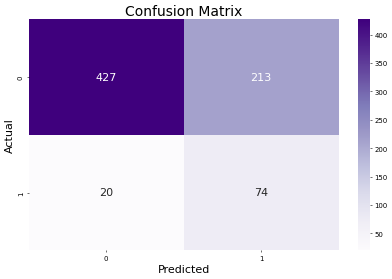

In [40]:
conf_matrix = metrics.confusion_matrix(y_val,y_predictions)
plot_confusion_matrix(conf_matrix)

### F1-Score

In [41]:
f1 = metrics.f1_score(y_val,y_predictions)
f1

0.3884514435695538

### ROC-Curve

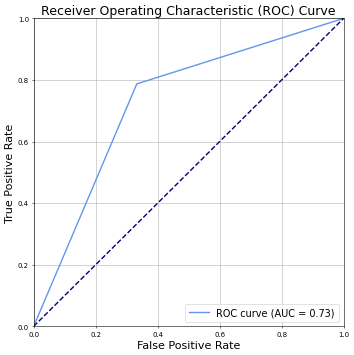

In [42]:
plot_roc_curve(y_val,y_predictions)

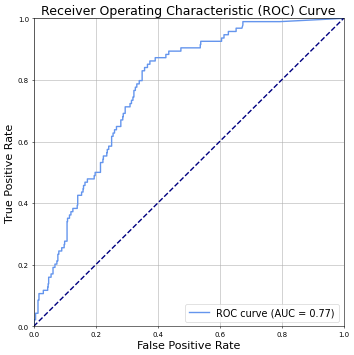

In [43]:
y_predictions_proba = forest_weighted.predict_proba(X_val)[:,1]
plot_roc_curve(y_val,y_predictions_proba)

### Abschließende Validierung mit den Test Daten

In [44]:
y_predictions = forest_weighted.predict(X_test)

In [45]:
accuracy = metrics.accuracy_score(y_test,y_predictions)
accuracy

0.7241847826086957

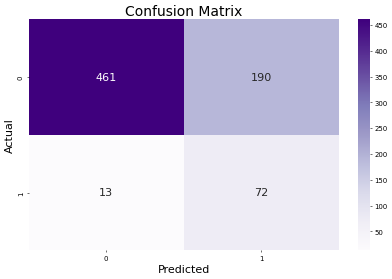

In [46]:
conf_matrix = metrics.confusion_matrix(y_test,y_predictions)
plot_confusion_matrix(conf_matrix)

In [47]:
f1 = metrics.f1_score(y_test,y_predictions)
f1

0.41498559077809793

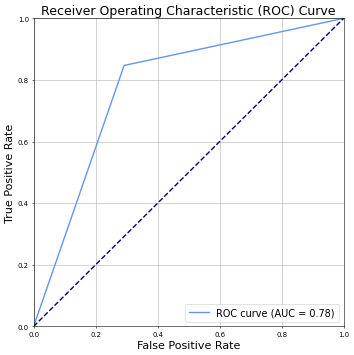

In [48]:
plot_roc_curve(y_test,y_predictions)

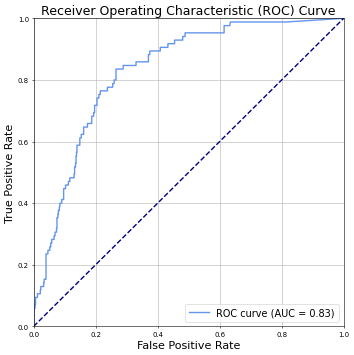

In [49]:
y_predictions_proba = forest_weighted.predict_proba(X_test)[:,1]
plot_roc_curve(y_test,y_predictions_proba)

#### Beurteilung des gewichteten Trainings:
Durch die Gewichtung der Daten wurden die Vorhersagen ausbalanciert. Leider ist diese Vorgehen ein Trade-Off. Die Gewichtung führt zu steigenden True Positiv Vorhersagen, allerdings auch zu steigenden False Negativ Vorhersagen. Die Accuracy sinkt, da im Gesamten die falschen Vorhersagen steigen. Die ROC-Curve und die Konfusionsmatrix zeigen allerdings eine positive Veränderung der Vorhersagen. Die AUC wurde von 0.55 auf 0.73 angehoben. Mit dem Testdatensatz beträgt diese sogar 0.78. Die Konfusionsmatrix zeigt, dass das Model jetzt deutlich eher eine positive Diabetes Diagnose vorhersagen würde. Vorher war das sehr unwahrscheinlich. Der F1-Score steigt und belegt die Balancierung der Vorhersagen. Die Gewichtung habe ich so angepasst, dass die Priorität eher auf der Erkennung einer positiven Diabetes Diagnose liegt, dafür aber auch positive Diagnosen gegeben werden, für Menschen die kein Diabetes haben.

### 7. Explainability
- Use SHAP to plot the importance of each feature for the predictions
- Use SHAP for two individual predictions (one person with diabetes predicted, one person with lower risk)

- Small check: Train another model (same hyperparameters), but remove the data of the 10 least important features. How does this affect your model performance?

In [50]:
explainer = shap.TreeExplainer(forest_weighted)

### Übersichtsdiagramm für alle Features

In [51]:
shap_values = explainer.shap_values(X_test)[1]

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


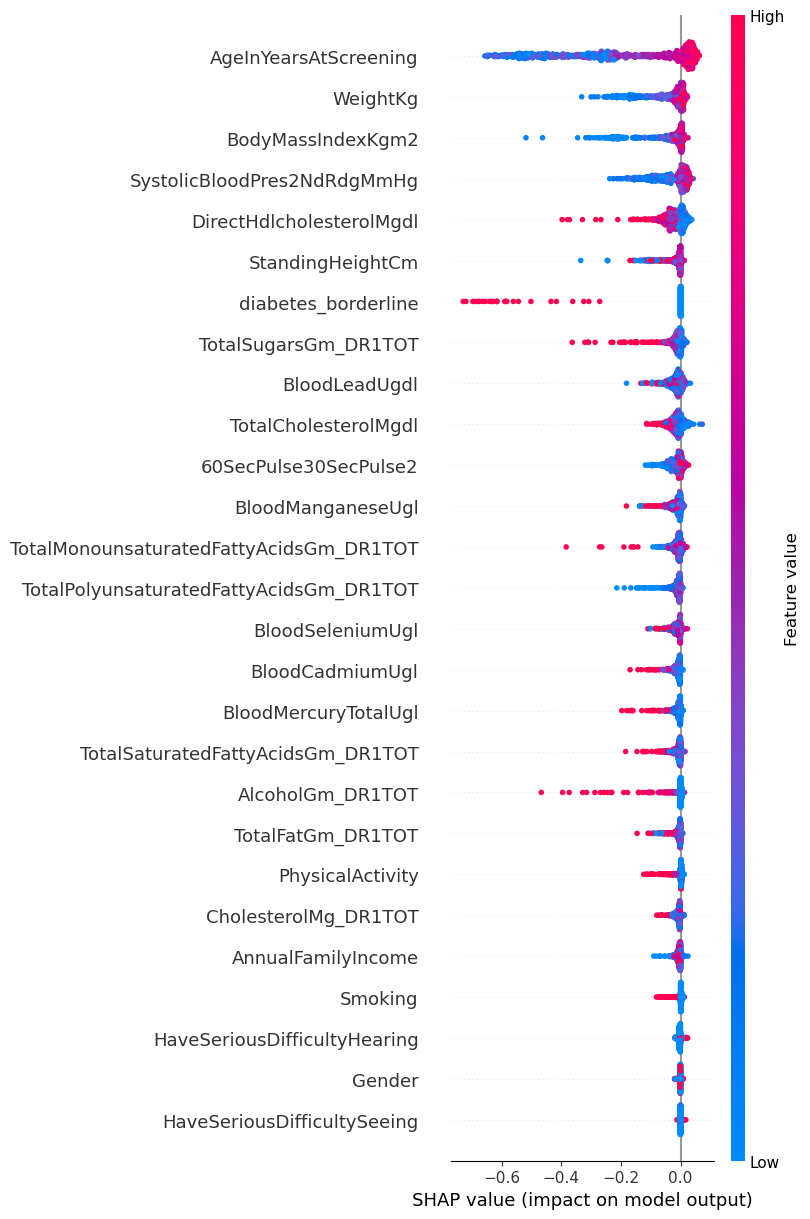

In [52]:
shap.summary_plot(shap_values,X_test, max_display=X.shape[1])

Man erkennt deutlich den Einfluss vom Alter, Gewicht, BMI und systolischem Blutdruck auf die Vorhersage des Models. Mit Abstand hat aber das hohe Alter den größten Einfluss (Diese Werte hatten ebenfalls die höchste Korrelation mit der Diagnose). Auch bei den anderen drei Features hat ein hoher Wert einen größeren Einfluss auf die Vorhersage des Models. Interessant ist auch, dass einige wenige niedrige Werte bei dem Feature TotalCholesterolMgdl die Modelvorhersage ebenfalls stark beinflusst haben. Allerdings hat das Feature in der Summe der Vorhersagen nur einen geringen Einfluss. 

### Übersichtsdiagramm für die Person mit Diabetes

In [53]:
proba_diabetes = forest_weighted.predict_proba(X_test)[:,1]

In [54]:
X_test_risk = X_test.copy(deep=True)
X_test_risk["predicted_risk"] = proba_diabetes
X_test_risk = X_test_risk.sort_values("predicted_risk", ascending=False)
X_test_risk.head()

,Gender,AgeInYearsAtScreening,HaveSeriousDifficultySeeing,HaveSeriousDifficultyHearing,WeightKg,StandingHeightCm,BodyMassIndexKgm2,BloodMercuryTotalUgl,BloodManganeseUgl,BloodSeleniumUgl,...,TotalSugarsGm_DR1TOT,BloodLeadUgdl,60SecPulse30SecPulse2,DirectHdlcholesterolMgdl,TotalCholesterolMgdl,SystolicBloodPres2NdRdgMmHg,Smoking,PhysicalActivity,diabetes_borderline,predicted_risk
SEQN,,,,,,,,,,,,,,,,,,,,,
102574.0,0,68.0,1.0,0.0,104.3,167.4,37.2,0.35,14.66,206.47,...,61.50,1.05,78.0,36.0,94.0,132.0,0,0.0,0,0.992311
94979.0,0,66.0,0.0,0.0,104.8,165.8,38.1,0.34,8.63,204.42,...,147.52,0.89,72.0,34.0,133.0,146.0,0,1.0,0,0.988558
102263.0,0,79.0,0.0,1.0,91.6,169.9,31.7,1.22,7.59,179.47,...,68.93,1.08,76.0,34.0,158.0,130.0,0,0.0,0,0.985859
98413.0,0,80.0,0.0,0.0,76.9,161.5,29.5,1.48,14.10,234.81,...,29.61,1.46,62.0,32.0,135.0,134.0,0,1.0,0,0.984656
102869.0,0,67.0,0.0,0.0,158.6,180.3,48.8,1.15,6.64,193.85,...,69.47,0.94,68.0,34.0,183.0,132.0,0,0.0,0,0.984248


In [55]:
patient_id = 102574.0 #Person mit dem höchsten Risiko eine positive Diabetes Diagnose zu erhalten

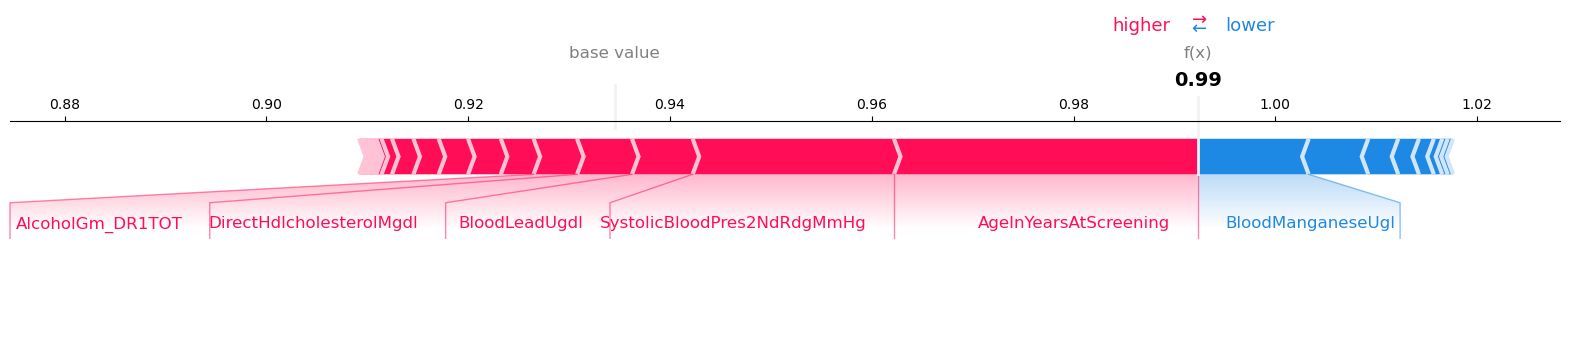

In [56]:
shap_value=explainer.shap_values(X_test.loc[patient_id])[1]
shap.force_plot(explainer.expected_value[1],shap_value, feature_names=X_test.columns, matplotlib=True)

Bei der Vorhersage für diese Person hatten die Features Alter und systolischer Blutdruck den größten Einfluss. Diese wirken stark darauf ein, dass die Wahrscheinlichkeit gegen 1 geht (positive Diagnose auf Diabetes). Das Merkmal BloodManganeseUGL beeinflusst die Vorhersage minimal und spicht gegen eine positive Diagnose. 

### Übersichtsdiagramm für die Person mit geringem Diabetesrisiko

In [168]:
X_test_risk.sort_values("predicted_risk", ascending=True).head()

,Gender,AgeInYearsAtScreening,HaveSeriousDifficultySeeing,HaveSeriousDifficultyHearing,WeightKg,StandingHeightCm,BodyMassIndexKgm2,BloodMercuryTotalUgl,BloodManganeseUgl,BloodSeleniumUgl,...,TotalSugarsGm_DR1TOT,BloodLeadUgdl,60SecPulse30SecPulse2,DirectHdlcholesterolMgdl,TotalCholesterolMgdl,SystolicBloodPres2NdRdgMmHg,Smoking,PhysicalActivity,diabetes_borderline,predicted_risk
SEQN,,,,,,,,,,,,,,,,,,,,,
98971.0,1,28.0,0.0,0.0,79.5,155.6,32.8,0.63,13.89,182.54,...,74.70,0.55,60.0,61.0,191.0,138.0,1,2.0,0,0.0
99542.0,0,12.0,0.0,0.0,40.1,151.4,17.5,0.20,10.64,184.36,...,132.98,0.72,76.0,66.0,170.0,96.0,0,0.0,0,0.0
97691.0,1,29.0,0.0,0.0,84.3,163.0,31.7,0.20,11.06,158.80,...,483.87,0.33,82.0,47.0,180.0,118.0,0,1.0,0,0.0
102298.0,1,19.0,0.0,0.0,52.1,158.3,20.8,1.36,8.28,185.28,...,44.05,0.69,78.0,60.0,165.0,102.0,0,1.0,0,0.0
94465.0,0,31.0,0.0,0.0,106.2,185.4,30.9,0.20,11.22,175.78,...,357.87,0.76,56.0,69.0,232.0,126.0,0,0.0,0,0.0


In [164]:
patient_id = 98971.0 #Person mit niedrigem Risiko eine positive Diabetes Diagnose zu erhalten

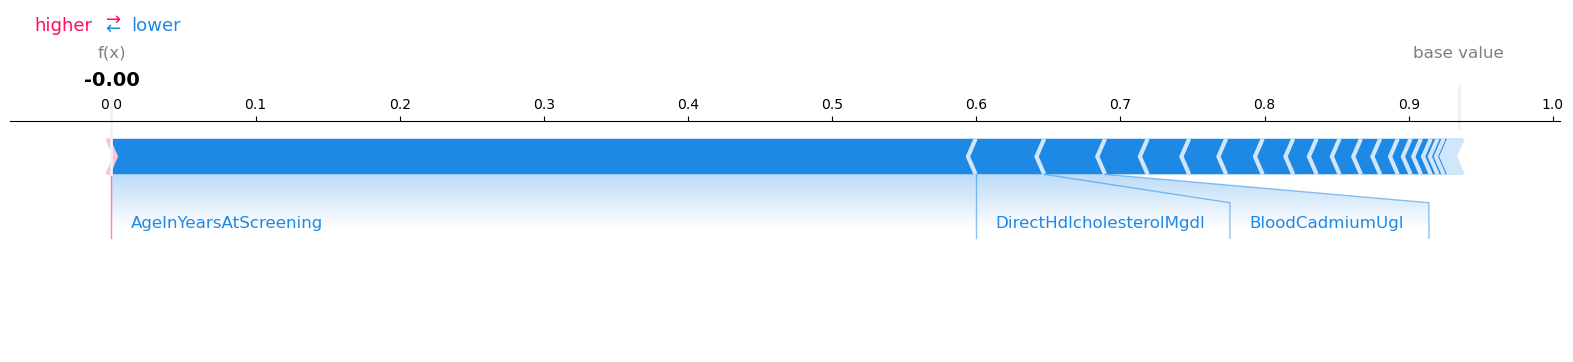

In [165]:
shap_value=explainer.shap_values(X_test.loc[patient_id])[1]
shap.force_plot(explainer.expected_value[1],shap_value, feature_names=X_test.columns, matplotlib=True)

Bei der Vorhersage für diese Person hatten das Feature Alter mit Abstand den größten Einfluss. Das junge Alter gibt einen deutlichen Ausschlag Richtung Vorhersage 0.0 (kein Diabetes). Bei dieser Vorhersage gibt es keine Features die eine positive Diagnose begünstigen würden.

### Model Training ohne die Daten der 10 unwichtigsten Features

##### Auswahl der 10 unwichtigsten Features

In [13]:
feature_importance = pd.DataFrame(forest_weighted.feature_importances_,columns=["feature_importance"], index=X_train.columns)

In [14]:
feature_importance = feature_importance.sort_values("feature_importance", ascending=True)
feature_importance

,feature_importance
HaveSeriousDifficultySeeing,0.000139
HaveSeriousDifficultyHearing,0.001486
Gender,0.002095
Smoking,0.002132
PhysicalActivity,0.009004
AnnualFamilyIncome,0.010686
AlcoholGm_DR1TOT,0.012125
TotalFatGm_DR1TOT,0.020844
CholesterolMg_DR1TOT,0.021617
BloodMercuryTotalUgl,0.022668


In [15]:
least_important_features = feature_importance.index[:10].tolist()
least_important_features

['HaveSeriousDifficultySeeing',
 'HaveSeriousDifficultyHearing',
 'Gender',
 'Smoking',
 'PhysicalActivity',
 'AnnualFamilyIncome',
 'AlcoholGm_DR1TOT',
 'TotalFatGm_DR1TOT',
 'CholesterolMg_DR1TOT',
 'BloodMercuryTotalUgl']

##### Erstellung des neuen Datensatzes ohne die genannten Features

In [16]:
X_train_without_least_important_features = X_train.drop(least_important_features, axis=1)
X_train_without_least_important_features.head()

,AgeInYearsAtScreening,WeightKg,StandingHeightCm,BodyMassIndexKgm2,BloodManganeseUgl,BloodSeleniumUgl,BloodCadmiumUgl,TotalPolyunsaturatedFattyAcidsGm_DR1TOT,TotalMonounsaturatedFattyAcidsGm_DR1TOT,TotalSaturatedFattyAcidsGm_DR1TOT,TotalSugarsGm_DR1TOT,BloodLeadUgdl,60SecPulse30SecPulse2,DirectHdlcholesterolMgdl,TotalCholesterolMgdl,SystolicBloodPres2NdRdgMmHg,diabetes_borderline
SEQN,,,,,,,,,,,,,,,,,
96677.0,25.0,93.9,165.3,34.4,8.73,202.32,0.33,10.433,25.064,49.902,170.17,0.38,90.0,56.0,197.0,112.0,0
100154.0,66.0,83.8,166.8,30.1,11.60,191.20,0.07,27.519,31.203,22.058,32.79,1.11,72.0,47.0,199.0,134.0,0
100196.0,32.0,66.5,170.2,23.0,9.81,159.16,0.16,31.323,29.472,20.265,123.31,0.53,84.0,85.0,216.0,106.0,0
98799.0,32.0,125.9,170.2,43.5,10.60,259.53,0.07,5.037,4.592,5.079,3.53,0.97,90.0,41.0,132.0,120.0,0
102336.0,33.0,80.0,174.7,26.2,10.85,170.66,0.21,25.554,27.775,22.824,40.56,1.36,76.0,58.0,222.0,118.0,0


Es langt die Features aus X_train und X_test zu entfernen, da nur die Spalten gelöscht werden. Die Anzahl der Zeilen bleibt gleich und stimmt auch weiterhin mit der Reihenfolge der Labels überein.

In [17]:
X_train_without_least_important_features.shape

(3435, 17)

#### Training des Models mit neuem Datensatz ohne die 10 unwichtigsten Features, aber mit gleichen Parametern

In [22]:
class_weights = {False:1, True:100}

forest_weighted_without_features = RandomForestClassifier(n_estimators=19,
                                max_depth=15,
                                min_samples_leaf=6,
                                random_state=10,
                                class_weight=class_weights)
forest_weighted_without_features.fit(X_train_without_least_important_features,y_train)

RandomForestClassifier(class_weight={False: 1, True: 100}, max_depth=15,
                       min_samples_leaf=6, n_estimators=19, random_state=10)

##### Performance mit Testdatensatz

In [33]:
X_test_without_least_important_features = X_test.drop(least_important_features, axis=1)
X_test_without_least_important_features.head()

,AgeInYearsAtScreening,WeightKg,StandingHeightCm,BodyMassIndexKgm2,BloodManganeseUgl,BloodSeleniumUgl,BloodCadmiumUgl,TotalPolyunsaturatedFattyAcidsGm_DR1TOT,TotalMonounsaturatedFattyAcidsGm_DR1TOT,TotalSaturatedFattyAcidsGm_DR1TOT,TotalSugarsGm_DR1TOT,BloodLeadUgdl,60SecPulse30SecPulse2,DirectHdlcholesterolMgdl,TotalCholesterolMgdl,SystolicBloodPres2NdRdgMmHg,diabetes_borderline
SEQN,,,,,,,,,,,,,,,,,
98971.0,28.0,79.5,155.6,32.8,13.89,182.54,0.60,8.423,10.167,10.713,74.70,0.55,60.0,61.0,191.0,138.0,0
96132.0,16.0,76.4,185.1,22.3,6.87,155.54,0.16,26.236,29.400,24.161,204.89,0.27,60.0,50.0,134.0,104.0,0
98952.0,24.0,80.0,165.8,29.1,8.67,211.02,0.07,21.809,19.213,10.069,100.94,0.47,80.0,35.0,289.0,134.0,0
99674.0,71.0,85.2,167.6,30.3,6.80,173.91,0.53,9.464,16.290,11.625,105.35,1.14,54.0,48.0,197.0,130.0,0
96237.0,58.0,56.3,160.8,21.8,11.39,174.02,2.27,12.393,8.602,7.436,12.24,3.28,92.0,122.0,265.0,136.0,0


In [34]:
y_predictions = forest_weighted_without_features.predict(X_test_without_least_important_features)

##### Accuracy

In [35]:
accuracy = metrics.accuracy_score(y_test,y_predictions)
accuracy

0.7350543478260869

##### Confusion Matrix

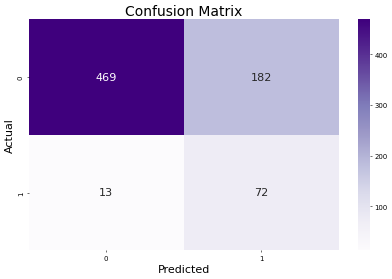

In [36]:
conf_matrix = metrics.confusion_matrix(y_test,y_predictions)
plot_confusion_matrix(conf_matrix)

##### F1-Score

In [ ]:
f1 = metrics.f1_score(y_val,y_predictions)
f1

0.37533512064343155

##### ROC-Curve

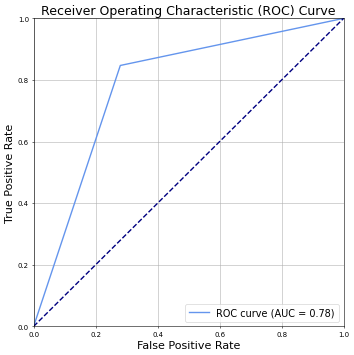

In [37]:
plot_roc_curve(y_test,y_predictions)

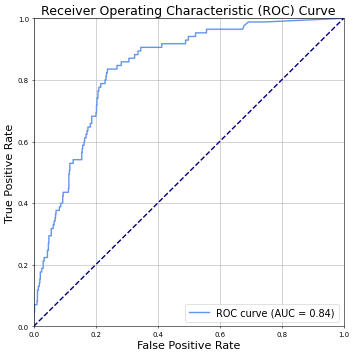

In [38]:
y_predictions_proba = y_predictions = forest_weighted_without_features.predict_proba(X_test_without_least_important_features)[:,1]
plot_roc_curve(y_test,y_predictions_proba)

#### Beurteilung des Models ohne die 10 unwichtigesten Features:
Durch das Löschen der 10 unwichtigsten Features hat sich die Performance kaum bis gar nicht verändert. Es fällt eine minimale Verbesserung bei der ROC-Curve auf (eher Schwankung). Die Accuracy blieb weitestgehend gleich. Da diese Features kaum Auswirkungen auf die Vorhersage des Models haben, fällt es also auch kaum auf, wenn diese beim Training des Models fehlen. (Eignet sich auch gut für eine Dimensionsreduzierung)

### 8. Conclusion
- How good is your model? How well can you predict diabetes?
- Could such a model be improved further? If so, what could be done to improve the model?

##### Antwort:
Nach der Anpassung der Gewichtung ist das Model deutlich besser in der Vorhersage einer positiven Diabetes Diagnose. Diese Gewichtung führt leider auch zu einem Anstieg der falsch positiven Vorhersagen und damit zu einer geringeren Accuracy im Gesamten. Bei 94 positiven Diagnosen im Valdierungsdatensatz konnten 74 richtig erkannt werden. Das entspricht ungefähr 80%. Die Vorhersagen mit dem Testdatensatz sind sogar noch besser ausgefallen. Auch die AUC (ROC-Curve) wurde durch die Gewichtung deutlich verbessert. Diese liegt beim Validierungsdatensatz bei 73% und beim Testdatensatz bei 78%. Der Bias in den Labels lässt sich also bedingt ausgleichen. Nichtsdestotrotz führt diese Verschiebung zu einer Verschlechterung der Vorhersagen im Gesamten (vorallem falsch positive). Von 640 negativen Diabetes Diagnosen (Validation Data) wurden 427 korrekt und 213 inkorrekt vorhergesagt. Das entspricht ca. 66% korrekten negativen Vorhersagen im Gesamten. Darin liegt auch die Schwäche des Models, es gibt zu viele falsch positive Vorhersagen. 

Um das Model weiter zu verbessern, könnten man den Trainingsdatensatz optimieren. Anstatt Zeilen mit NaN's zu löschen, könnte man Mittelwerte der entsprechenden Features bilden und für die NaN Felder einsetzen, um so den Datensatz nicht zu verkleinern. Mehr Datenpunkte, vorallem welche mit einer positiven Diagnose, könnten die Performance des Models weiter steigern.
Ein anderer Ansatz wäre auch unnötige Features zu löschen, damit weniger NaNs im Datensatz enthalten sind und so am Ende mehr Datenpunkte, nach der Löschung der Zeilen mit NaNs, zur Verfügung stehen.



#### Compare your results to current research [Dinh et al., 2019](https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-019-0918-5). Obviously, it is not 100% the same data, but somewhat comparable. Two specific questions to answer: Is your model of comparable type to what they used in their study? And did you get a comparable model performance?

##### Antwort:
In der Studie wurden verschiedene Modelle in ihrer Performance evaluiert und anschließend in einem Ensemble Model kombiniert, welches aus logistic regression, support vector machines, random forest und gradient boosting Modellen besteht. Das von mir trainierte Model ist nur ein random forest Model. Dieses kombiniert aber auch die Vorhersagen mehrerer Entscheidungsbäume, um die Genauigkeit und Robustheit der Vorhersagen zu verbessern. Im Allgemeinen sind also beide Modelle ein Ensemble aus unterschiedlichen Ansätzen (Ensemble Model). Allerdings vereint das Ensemble Model im Paper deutlich mehr Machine Learning Modelle und schafft es so robuster gegenüber Bias, z.B. im Label, zu sein.

Vergleicht man die Performance beider Modelle in der Vorhersage von Diabetes, sieht man, dass der Ensemble Ansatz im Paper zu einer Steigerung der Performance führt. Allerdings nicht so stark wie ich anfangs vermutet habe. Meistens schneidet das Boost Model besser als das Ensemble Model ab und die Performance vom Random Forest Model unterscheidet sich auch nicht stark. Die ROC-Curve meines Random Forest Models, die mit vorhergesagten Wahrscheinlichkeiten (predict_proba) erstellt wurde, weißt auf dem Testdatensatz eine AUC-Performance von 0.83% auf. Damit liegt mein Model ebenfalls im oberen Bereich, zumindest im Vergleich zu dem Datensatz ohne Labordaten "no lab" im Paper. Der F1-Score unterscheidet sich zum Ansatz im Paper aber noch deutlich. Das liegt an der niedrigen Precision, die durch die vielen falsch positiven Vorhersagen zustande kommt. Gerade bei dem Datensatz der Labordaten enthält (with lab, Case 1, 1999-2014, 2003-2014), liegt die Performance des Models aus dem Paper noch deutlich über meinem.

Ich gehe davon aus das ein größerer Datensatz (wie z.B. der im Paper) zu einer weiteren Steigerung führen könnte. Im Vergleich zu dem betriebenen Aufwand im Paper ist der Einsatz eines Random Forest Models aber ein guter Startpunkt, um ein passables Ergebnis zu erzielen. 